In [1]:
from __future__ import division
from __future__ import print_function
from __future__ import absolute_import

from sympy import *
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

# NEWTON
-----------------

In [16]:
epsilon = 10e-5

def newtonsUpdate(xk, deriv1, H):
    """
        xk:        Current value 
        deriv1 : 1st order derivative
        H      : Hessian matrix (2nd order derivative)
        
        pk (Search direction) = - inv(H).deriv1_xk 
    """
#     print (H, type(H))
    pk = np.dot(np.linalg.inv(H),  deriv1)
    xk1 = xk - pk
    return xk1


def iterate(f, xk, deriv_1, H, numFeatures, numSteps, should_print):
    fx_arr = []
    gradientNorm_arr = []
    
    for step in range(numSteps): 
        if numFeatures == 3:
            fx = f.evalf(subs={x1:xk[0], x2:xk[1], x3:xk[2]})
            gradient_xk = np.array([eq.evalf(subs={x1:xk[0], x2:xk[1], x3:xk[2]}) for eq in deriv_1], 
                                   dtype=float)      

            H_lv = np.array([cell.evalf(subs={x1:xk[0], x2:xk[1], x3:xk[2]}) 
                          for rows in H
                          for cell in rows], dtype='float').reshape(3,3)
        elif numFeatures == 2:
            fx = f.evalf(subs={x1:xk[0], x2:xk[1]})
            gradient_xk = np.array([eq.evalf(subs={x1:xk[0], x2:xk[1]}) for eq in deriv_1], 
                                   dtype=float)
            H_lv = np.array([cell.evalf(subs={x1:xk[0], x2:xk[1]}) 
                          for rows in H
                          for cell in rows], dtype='float').reshape(2,2)
        else:
            raise ValueError('Num Features doesnt match the handled condition')
            
        fx_arr.append(fx)
        gradientNorm = np.linalg.norm(gradient_xk)
        gradientNorm_arr.append(gradientNorm)
        
        if should_print:
            if (step+1)%should_print == 0:
                print('')
                print ('##########################################################')
                print ('Function F at x: f(x) ', fx)
                print ('Gradient at xk%s is: '%str(step), gradient_xk)
                print ("####### Gradient Norm: ", gradientNorm)
                print('The updated Value xk%s is \n'%(step+1), xk)
                
#         print ((gradientNorm/(1+np.abs(gradient_xk))))
#         print ((gradientNorm/(1+np.abs(gradient_xk))) <= epsilon)
#         print (np.sum((gradientNorm/(1+np.abs(gradient_xk))) <= epsilon))
        if np.sum((gradientNorm/(1+np.abs(gradient_xk))) <= epsilon) == len(gradient_xk) or (step == 1000):
            print('The check (gradient norm equation reach a val < epsilon, HENCE BREAKING OUT OF LOOP)')
            break
            
        xk1 = newtonsUpdate(xk, deriv1=gradient_xk, H=H_lv)
        xk = xk1
        
    return fx_arr, gradientNorm_arr


# def plot(x):
#     plt.plot(np.arange(len(x)), x, edgecolor='k')
#     plt.xlabel("Number of Iteration")
#     plt.ylabel('Loss Function')
#     plt.grid(True)
    
def plot(x_arr, rows=1, columns=2, figsize=(10, 3)):
    fig1, axs = plt.subplots(rows,columns, figsize=figsize, facecolor='w', edgecolor='k')
    if columns>1:
        axs = axs.ravel()
    for no, arrVal in enumerate(x_arr):
        axs[no].plot(np.arange(len(arrVal)), arrVal)
        if no == 0:
            axs[no].set_xlabel('num of Iteration')
            axs[no].set_ylabel('Function f(x) at step')
            axs[no].set_title('Function Vs Num Iteration')
        else:
            axs[no].set_xlabel('num of Iteration')
            axs[no].set_ylabel('Gradient Norm at step')
            axs[no].set_title('Gradient Norm Vs Num Iteration')
# ax1.set_title('ax1 title')
# ax2.set_title('ax2 title')


# Newtons Method:

# Solution d(1)

[2*x1 2*x2 2*x3]
[[2 0 0]
 [0 2 0]
 [0 0 2]]

##########################################################
Function F at x: f(x)  3.00000000000000
Gradient at xk0 is:  [ 2.  2.  2.]
####### Gradient Norm:  3.46410161514
The updated Value xk1 is 
 [1 1 1]

##########################################################
Function F at x: f(x)  0.e-125
Gradient at xk1 is:  [ 0.  0.  0.]
####### Gradient Norm:  0.0
The updated Value xk2 is 
 [ 0.  0.  0.]
The check (gradient norm equation reach a val < epsilon, HENCE BREAKING OUT OF LOOP)


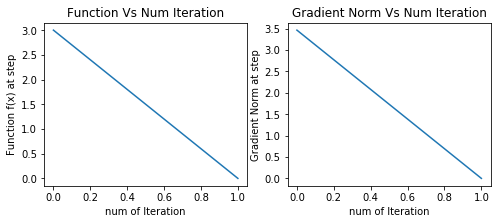

In [5]:
x1 = Symbol('x1')
x2 = Symbol('x2')
x3 = Symbol('x3')
f = pow(x1,2) + pow(x2,2) + pow(x3,2)
deriv_1 = np.array([f.diff(x1), f.diff(x2), f.diff(x3)])
H = np.array([d_eq.diff(xn) for d_eq in deriv_1 for xn in [x1,x2,x3]]).reshape(3,3)
print(deriv_1)
print (H)

xk = np.array([1,1,1])

fx_array, gradientNorm_arr = iterate(f, xk, deriv_1, H, numFeatures=3, numSteps=10, should_print=1)

plot([fx_array, gradientNorm_arr])

# Solution d(2)


##########################################################
Function F at x: f(x)  0.e-125
Gradient at xk0 is:  [  1.18182126e-125  -2.00000000e+000]
####### Gradient Norm:  2.0
The updated Value xk1 is 
 [0 0]

##########################################################
Function F at x: f(x)  -1.00000000000000
Gradient at xk1 is:  [  4.72728505e-125   9.45457010e-125]
####### Gradient Norm:  1.0570530726e-124
The updated Value xk2 is 
 [ 1.  1.]
The check (gradient norm equation reach a val < epsilon, HENCE BREAKING OUT OF LOOP)


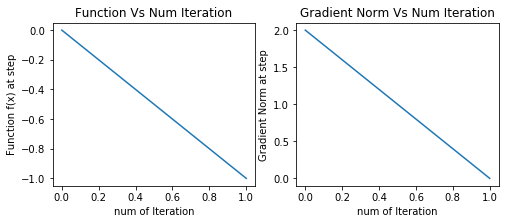

In [9]:
x1 = Symbol('x1')
x2 = Symbol('x2')
f = pow(x1,2) + 2*pow(x2,2) - 2*x1*x2 - 2*x2
deriv_1 = np.array([f.diff(x1), f.diff(x2)])
H = np.array([[deriv_1[0].diff(x1),deriv_1[0].diff(x2)],
                    [deriv_1[1].diff(x1),deriv_1[1].diff(x2)]])
# print (H)
xk = np.array([0,0])

fx_array, gradientNorm_arr = iterate(f, xk, deriv_1, H, numFeatures=2, numSteps=10, should_print=1)

plot([fx_array, gradientNorm_arr])

# Solution d(3)


##########################################################
Function F at x: f(x)  24.2000000000000
Gradient at xk0 is:  [-215.6  -88. ]
####### Gradient Norm:  232.867687754
The updated Value xk1 is 
 [-1.2  1. ]

##########################################################
Function F at x: f(x)  4.73188432526661
Gradient at xk1 is:  [-4.63781641 -0.12220679]
####### Gradient Norm:  4.63942621407
The updated Value xk2 is 
 [-1.1752809   1.38067416]

##########################################################
Function F at x: f(x)  1411.84517930947
Gradient at xk2 is:  [ 1146.45069037  -751.47563227]
####### Gradient Norm:  1370.78984945
The updated Value xk3 is 
 [ 0.76311487 -3.17503385]

##########################################################
Function F at x: f(x)  0.0559655168339477
Gradient at xk3 is:  [ -4.73110379e-01  -1.98207785e-05]
####### Gradient Norm:  0.473110379106
The updated Value xk4 is 
 [ 0.76342968  0.58282478]

####################################################

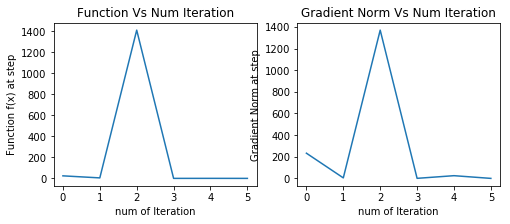

In [7]:
x1 = Symbol('x1')
x2 = Symbol('x2')
f = (-x1 + 1)**2 + 100*(-x1**2 + x2)**2
deriv_1 = np.array([f.diff(x1), f.diff(x2)])
H = np.array([[deriv_1[0].diff(x1),deriv_1[0].diff(x2)],
              [deriv_1[1].diff(x1),deriv_1[1].diff(x2)]])
# print(deriv_1)
# print(H)
xk = np.array([-1.2,1])

fx_array, gradientNorm_arr = iterate(f, xk, deriv_1, H, numFeatures=2, numSteps=10, should_print=1)

plot([fx_array, gradientNorm_arr])


# Solution d(4)

[[12*(x1 + x2)**2 12*(x1 + x2)**2]
 [12*(x1 + x2)**2 12*(x1 + x2)**2 + 2]]

##########################################################
Function F at x: f(x)  0.e-2419
Gradient at xk1 is:  [ 0.  0.]
####### Gradient Norm:  0.0
The updated Value xk2 is 
 [ 0.  0.]
The check (gradient norm equation reach a val < epsilon, HENCE BREAKING OUT OF LOOP)


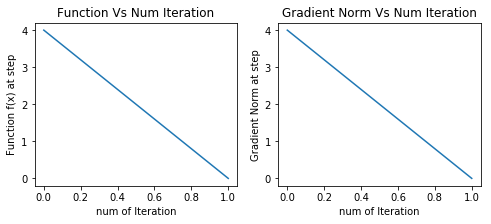

In [10]:
x1 = Symbol('x1')
x2 = Symbol('x2')
f = x2**2 + (x1 + x2)**4
deriv_1 = np.array([f.diff(x1), f.diff(x2)])
H = np.array([[deriv_1[0].diff(x1), deriv_1[0].diff(x2)],
                    [deriv_1[1].diff(x1),deriv_1[1].diff(x2)]])
print (H)
xk = np.array([2,-2])

fx_array, gradientNorm_arr = iterate(f, xk, deriv_1, H, numFeatures=2, numSteps=20, should_print=2)

plot([fx_array, gradientNorm_arr])


# Solution d(5) :

### a)


##########################################################
Function F at x: f(x)  7.06250000000000
Gradient at xk0 is:  [  7. -11.]
####### Gradient Norm:  13.0384048104
The updated Value xk1 is 
 [ 1 -1]

##########################################################
Function F at x: f(x)  2.47525436168877
Gradient at xk1 is:  [ 2.028183   -3.95180001]
####### Gradient Norm:  4.44187456079
The updated Value xk2 is 
 [ 0.86222222 -0.41777778]

##########################################################
Function F at x: f(x)  0.889990361724683
Gradient at xk2 is:  [ 1.43882305 -1.08248983]
####### Gradient Norm:  1.80055435962
The updated Value xk3 is 
 [ 0.84584565  0.22567953]

##########################################################
Function F at x: f(x)  0.549473921728686
Gradient at xk3 is:  [ 0.49593839  0.04940551]
####### Gradient Norm:  0.498393211195
The updated Value xk4 is 
 [ 0.65071922  0.53430307]

##########################################################
Function F at x: 

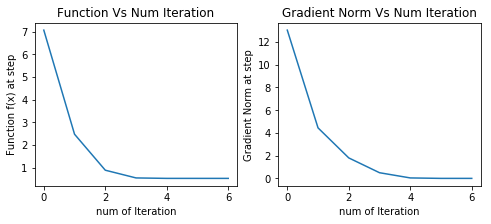

In [11]:
c = 1
x1 = Symbol('x1')
x2 = Symbol('x2')
f = (x1-1)**2 + (x2-1)**2 + (x1**2 + x2**2 -0.25)**2
deriv_1 = np.array([f.diff(x1), f.diff(x2)])
H = np.array([[deriv_1[0].diff(x1),deriv_1[0].diff(x2)], 
              [deriv_1[1].diff(x1),deriv_1[1].diff(x2)]])
# print(deriv_1)
# print(deriv_2)
xk = np.array([1,-1])

fx_array, gradientNorm_arr = iterate(f, xk, deriv_1, H, numFeatures=2, numSteps=10, should_print=1)

plot([fx_array, gradientNorm_arr])


### b)


##########################################################
Function F at x: f(x)  34.6250000000000
Gradient at xk0 is:  [ 70. -74.]
####### Gradient Norm:  101.862652626
The updated Value xk1 is 
 [ 1 -1]

##########################################################
Function F at x: f(x)  7.78084267935384
Gradient at xk1 is:  [ 19.60310348 -21.93023299]
####### Gradient Norm:  29.4145675661
The updated Value xk2 is 
 [ 0.71743295 -0.66187739]

##########################################################
Function F at x: f(x)  2.77929624528782
Gradient at xk2 is:  [ 4.94174617 -6.87243959]
####### Gradient Norm:  8.46470797957
The updated Value xk3 is 
 [ 0.57869993 -0.40619181]

##########################################################
Function F at x: f(x)  1.56411230417889
Gradient at xk3 is:  [ 1.7534693  -2.81791674]
####### Gradient Norm:  3.31893195557
The updated Value xk4 is 
 [ 0.58628575 -0.12775725]

##########################################################
Function F at x: f

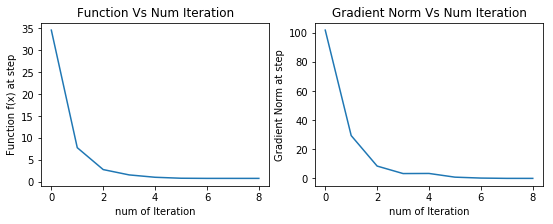

In [14]:
c = 10
x1 = Symbol('x1')
x2 = Symbol('x2')
f = (x1 - 1)**2 + (x2 - 1)**2 + 10*(x1**2 + x2**2 - 0.25)**2
deriv_1 = np.array([f.diff(x1), f.diff(x2)])
H = np.array([[deriv_1[0].diff(x1),deriv_1[0].diff(x2)], 
              [deriv_1[1].diff(x1),deriv_1[1].diff(x2)]])
# print(deriv_1)
# print(deriv_2)
xk = np.array([1,-1])

fx_array, gradientNorm_arr = iterate(f, xk, deriv_1, H, numFeatures=2, numSteps=10, should_print=1)

plot([fx_array, gradientNorm_arr])


### c)


##########################################################
Function F at x: f(x)  54.2489151737964
Gradient at xk1 is:  [ 199.32900818 -201.68524959]
####### Gradient Norm:  283.564795778
The updated Value xk2 is 
 [ 0.69789679 -0.69219878]

##########################################################
Function F at x: f(x)  2.75444685518407
Gradient at xk3 is:  [ 11.34115659 -13.72682731]
####### Gradient Norm:  17.8058310862
The updated Value xk4 is 
 [ 0.42694527 -0.37528331]

##########################################################
Function F at x: f(x)  2.25252488808198
Gradient at xk5 is:  [ 24.57867486  -1.05917894]
####### Gradient Norm:  24.6014860895
The updated Value xk6 is 
 [ 0.5965986   0.02111815]

##########################################################
Function F at x: f(x)  0.976248509434432
Gradient at xk7 is:  [ 4.46441119  0.72287489]
####### Gradient Norm:  4.52255629063
The updated Value xk8 is 
 [ 0.4861251   0.20476077]

######################################

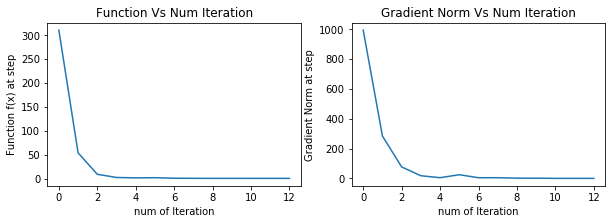

In [17]:
c = 10
x1 = Symbol('x1')
x2 = Symbol('x2')
f = (x1 - 1)**2 + (x2 - 1)**2 + 100*(x1**2 + x2**2 - 0.25)**2
deriv_1 = np.array([f.diff(x1), f.diff(x2)])
H = np.array([[deriv_1[0].diff(x1),deriv_1[0].diff(x2)], 
              [deriv_1[1].diff(x1),deriv_1[1].diff(x2)]])
# print(deriv_1)
# print(deriv_2)
xk = np.array([1,-1])

fx_array, gradientNorm_arr = iterate(f, xk, deriv_1, H, numFeatures=2, numSteps=20, should_print=2)

plot([fx_array, gradientNorm_arr])
